# Интерполяция параметрически заданной функции

Рассмотрим задачу поиска интерполирующей кривой по точкам $p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$). Предположим, что форму этой кривой нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать для кривой в форме буквы S и др. (функция была бы неоднозначной).

Рассмотрим два набора данных $(i, x_i)$ и $(i, y_i)$ ($i=1,\dots,n$). Их можно независимо интерполировать функциями $f(t)$, $g(t)$. Тогда кривая, заданная параметрически,$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$будет интерполировать наши данные.

Другой способ – интерполировать данные $(\sum_{i=1}^{i-1} d_i, x_i)$ и $(\sum_{i=1}^{i-1} d_i, y_i)$ ($i=1,\dots,n$), где $d_i$ – расстояние между точками $p_i$ и $p_{i+1}$.

### Задача:

Нарисовать букву S (или любую другую) и измерить координаты $8$ точек $p_i$, лежащих на ней. Интерполировать эти данные обоими способами, описанными выше

 1. кубическим интерполяетом;
 2. кубическим сплайном.
 
Изобразить полученные кривые и сравнить результаты.

## Способ 1

Нарисуем букву S и измерим координаты восьми точек на ней

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [28]:
x = np.array([1, 4.5, 8, 6, 3, 1, 4.5, 8])
y = np.array([2, 1, 2, 4, 5, 7, 8, 7])

Изобразим полученные начальные данные, на которых заметен силуэт буквы S:

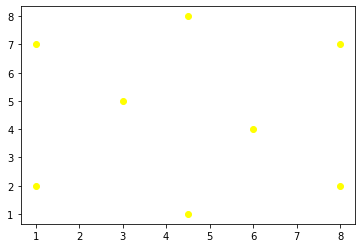

In [29]:
plt.plot(x, y, 'o', color='yellow')
pass

Подготовим массив индексов i и linspace для построения графика:

In [30]:
i = np.array([1, 2, 3, 4, 5, 6, 7, 8])
t = np.linspace(1, 8, 500)

Интерполируем полученные данные **кубическим интерполянтом**

In [31]:
f = np.polyfit(i, x, 3)
g = np.polyfit(i, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)

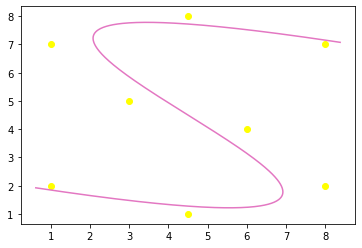

In [32]:
plt.plot(x, y, 'o', color='yellow')
plt.plot(xx, yy, color="tab:pink")
pass

Буква S не касается точек на графике.

Интерполируем полученные данные **кубическим сплайном**

In [33]:
f = interpolate.interp1d(i, x, kind='cubic')
g = interpolate.interp1d(i, y, kind='cubic')
xx = f(t)
yy = g(t)

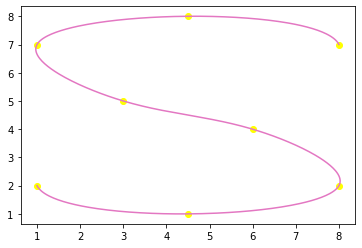

In [34]:
plt.plot(x, y, 'o', color='yellow')
plt.plot(xx, yy, color="tab:pink")
pass

## Cпособ 2

Подготовим список расстояний между точками:

In [35]:
d = np.array([])
for i in range(len(x)-1):
    dist = np.sqrt((x[i + 1] - x[i]) ** 2 + (y[i + 1] - y[i]) ** 2)
    d = np.append(d, np.array(dist))
d

array([3.64005494, 3.64005494, 2.82842712, 3.16227766, 2.82842712,
       3.64005494, 3.64005494])

$d_i$ - список необходимых сумм расстояний между точками

In [36]:
di = np.array([])
di=0
for j in range(1,len(x)):
    di = np.append(di, d[i])
    d[i]+=d[j-1]
di

array([ 0.        ,  3.64005494,  7.28010989, 10.92016483, 13.74859196,
       16.91086962, 19.73929674, 23.37935169])

Изменим linspace в соответствии с со списком $d_i$ для корректного постороения:

In [37]:
t = np.linspace(0, 23, 500)

Интерполируем полученные данные **кубическим интерполянтом** :

In [38]:
f = np.polyfit(di, x, 3)
g = np.polyfit(di, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)

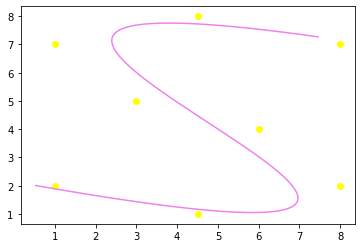

In [39]:
plt.plot(x, y, 'o', color='yellow')
plt.plot(xx, yy, color="violet")
pass

Результат в точь повторяет первый случай.

Теперь интерполируем полученные данные **кубическим сплайном**:

In [40]:
f = interpolate.interp1d(di, x, kind='cubic')
g = interpolate.interp1d(di, y, kind='cubic')
xx = f(t)
yy = g(t)

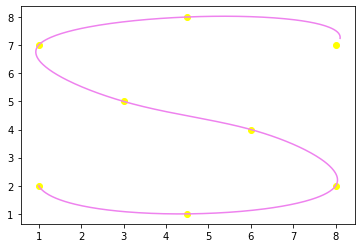

In [41]:
plt.plot(x, y, 'o', color='yellow')
plt.plot(xx, yy, color="violet")
pass

## Вывод:

В обоих случая получается схожий результат. Однако кубический интерполянт получается плавным, но отдаленным от точек, заданных изначально. Кубический сплайн же дает наиболее четкую картину, отображая результат, масимально приближенный к реальности.